In [23]:
# import all the nessecary depencency for the project

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Import the CSV data as pandas Dataframe

In [24]:
df=pd.read_csv('data/stud.csv')

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
df.shape

(1000, 8)

In [27]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Data checks to perform

1. checking missing value
2. checking duplicate values
3. check datatype
4. check the number of unique value of each columns


In [28]:
# checking missing value
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Result : There is no null value at any column

In [29]:
# checking duplicate value
df.duplicated().sum()

0

Result : There is no Duplicate value in the dataset

In [30]:
# checking the number of unique value of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [31]:
# checking the statistic of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight :
 
    1. All means are very close to each other - between 66 and 68.05
    2. all standard deviation are very close - between 14.6 - 15.19
    3. Max value is same for very statistic columns
    4. Min value of math_score=0 , reading_score=17 and writing score = 15

Exploring the data

In [32]:
print("Categories in 'gender' variable :   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable :   ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable :   ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable :   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable :   ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable :    ['female' 'male']
Categories in 'race_ethnicity' variable :    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable :    ['none' 'completed']


In [33]:
# define categorical and numeical feature

numeric_feature=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype == 'O']


# print the columns
print("We have {} numerical features  : {}".format(len(numeric_feature),numeric_feature))
print("\nWe have {} categorical features  : {}".format(len(categorical_feature),categorical_feature))




We have 3 numerical features  : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features  : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding two new feature 'Total score' and 'Average score'

In [34]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [38]:
reading_full=df[df['reading_score'] == 100]['average'].count()
writing_full=df[df['writing_score'] == 100]['average'].count()
math_full=df[df['math_score'] == 100]['average'].count()

print(f"Number if student with full marks in Maths : {math_full}")
print(f"Number if student with full marks in reading : {reading_full}")
print(f"Number if student with full marks in writing : {writing_full}")

Number if student with full marks in Maths : 7
Number if student with full marks in reading : 17
Number if student with full marks in writing : 14


In [39]:
reading_less_20=df[df['reading_score'] <= 20]['average'].count()
writing_less_20=df[df['writing_score'] <= 20]['average'].count()
math_less_20=df[df['math_score'] <= 20]['average'].count()

print(f"Number if student with full marks in Maths : {math_less_20}")
print(f"Number if student with full marks in reading : {reading_less_20}")
print(f"Number if student with full marks in writing : {writing_less_20}")

Number if student with full marks in Maths : 4
Number if student with full marks in reading : 1
Number if student with full marks in writing : 3


Visulizaton


Histogram & KDE

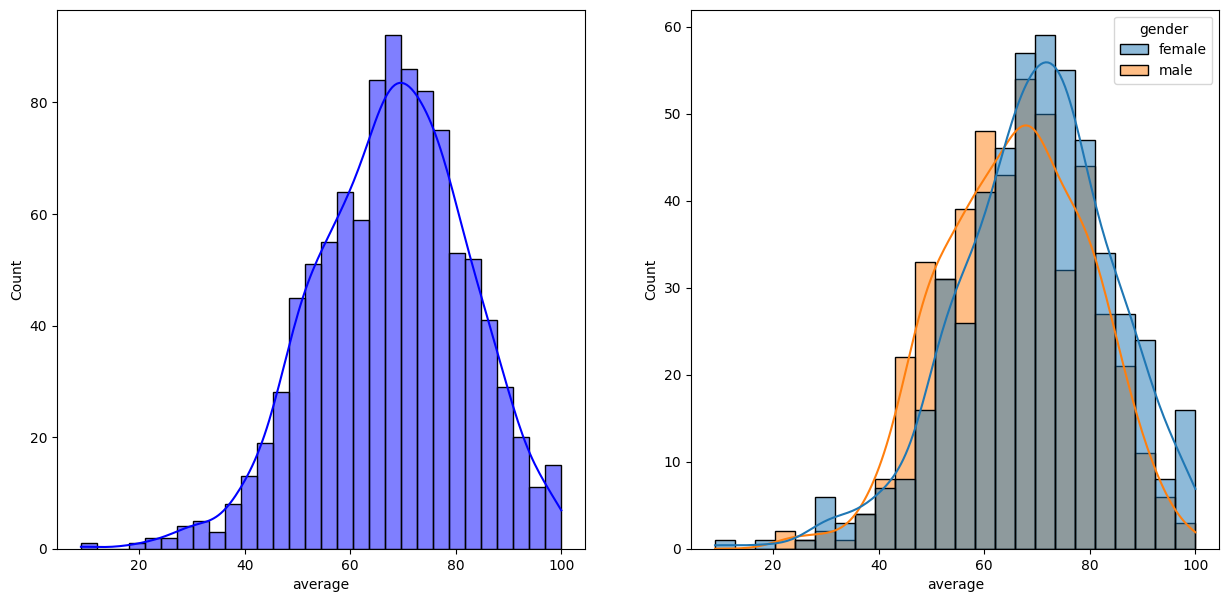

In [40]:
fig , axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',bins=30,kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',hue='gender',kde=True)
plt.show()

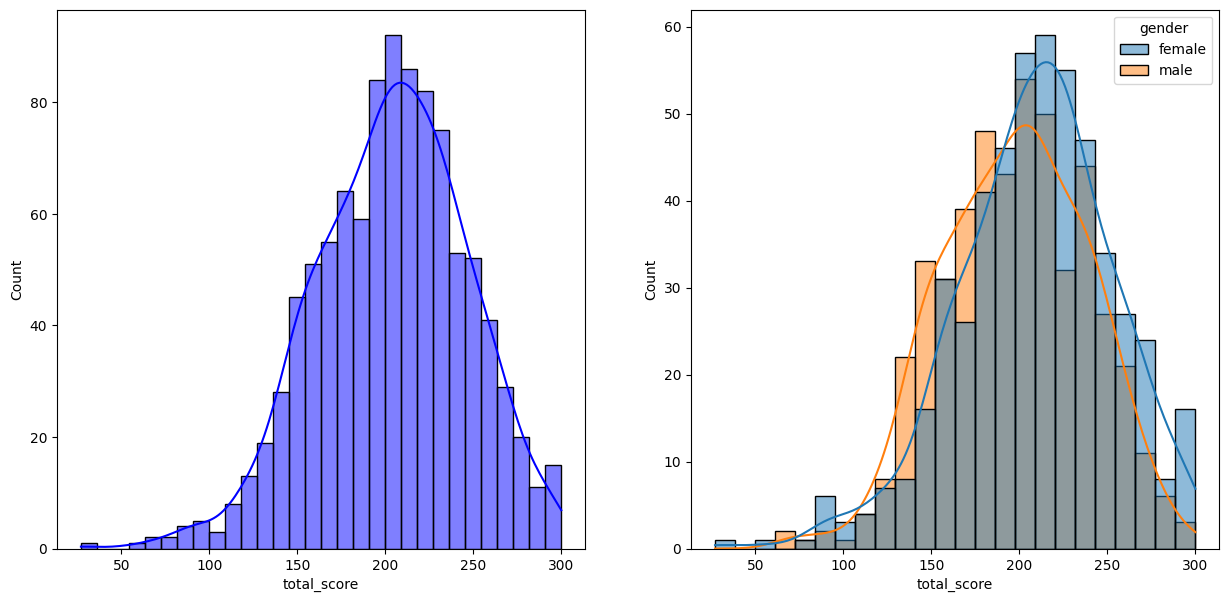

In [41]:
fig , axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',hue='gender',kde=True)
plt.show()

The vizulization will be continue..